# Model prototype, v2 (numpified)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [184]:
class Const:
    """One handle to hold all constants."""
    def __init__(self):
        self.MAX_BOTS = 1000
        self.MOTILITY = 0.01      # Brownian motion amplitude
        
C = Const()

In [195]:
class Swarm:
    """Archetypal swarm of bots, to be used by all animals types, as well as food."""
    
    def __init__(self,name=None):
        """Init empty swarm"""
        self.name = name
        self.xy = np.array([])
        self.val = np.array([])
        
    def __str__(self):
        out = ''
        for i in range(self.xy.shape[0]):
            out += f'{i}: {self.xy[i,:]} - {self.val[i]}\n'
        return out
        
    def add(self,n=1,xy=None,val=None):
        """Add one or several bots, setting their values."""
        if xy is None:            
            xy = np.random.random(size=(n,2)) # Default values
        if val is None:           
            val = np.ones((n,1))
        if len(self.xy)==0:
            self.xy = xy
            self.val = val
        else:
            self.xy  = np.concatenate((self.xy,xy),axis=0)
            self.val = np.concatenate((self.val,val))
            
    def kill(self,l=None):
        """Kills one or several bots. Takes either one number, or many, or boolean ndarray."""
        if l is None: return None
        if type(l) is int: l = [l]
        if type(l[0]) is int: l = np.array([bool(i in l) for i in range(len(self.val))])
        self.xy = self.xy[np.logical_not(l),:]
        self.val = self.val[np.logical_not(l)]
        
    def move(self):
        """Moves bots at random"""
        self.xy = np.maximum(0,np.minimum(1,self.xy + np.random.normal(size=self.xy.shape, scale=C.MOTILITY)))
        
    def distance(self,other=None):
        """Calculates distances matrix to another (or same) Bots object."""
        if other is None: other = self
        return np.sqrt((self.xy[:,0]-np.expand_dims(other.xy[:,0],1))**2 + 
                       (self.xy[:,1]-np.expand_dims(other.xy[:,1],1))**2)
        
            
# Tests go here, if needed:
Bots = Swarm()
Bots.add()
print(Bots)
Bots.move()
print(Bots)

0: [0.161356   0.56931865] - [1.]

0: [0.15769598 0.56575773] - [1.]



In [226]:
class MagicFigure:
    """Updatable figure."""
    def __init__(self,ax=None):
        if ax is None:
            self.fig, self.ax = plt.subplots(1,1)
            self.fig.set_size_inches(3,3)
            self.ax.set_xlim((0,1))
            self.ax.set_ylim((0,1))
        else:
            self.ax = ax
        plt.draw()        

    def draw_animals(a,xy,clr):
        if len(a.collections)==0:
            a.scatter(xy[:,0],xy[:,1],c=clr,vmin=-1, vmax=100)
        else:
            a.collections[0].set_offsets(xy)
            a.collections[0].set_array(clr)

    def graph(self,y):
        '''Update the population graph on the right with a new number'''
        if len(self.ax.lines)==0:
            print('goat')
            self.ax.plot(np.arange(y.shape[0]),y,'.-')
        else:
            self.ax.lines[0].set_xdata(np.arange(y.shape[0]))
            self.ax.lines[0].set_ydata(y)
            self.ax.set_xlim(0,y.shape[0])
            self.ax.set_ylim(0,max(self.ax.get_ylim()[1],y[-1]))
            
    def draw_bots(self,B,style=None):
        """Draw Bots."""
        if style is None: style = 'k.'    
        if not hasattr(B,"plot_object"):
            plot_object = self.ax.plot(B.xy[:,0],B.xy[:,1],style)
            B.plot_object = plot_object[0]
        else:
            B.plot_object.set_xdata(B.xy[:,0])
            B.plot_object.set_ydata(B.xy[:,1])

<IPython.core.display.Javascript object>


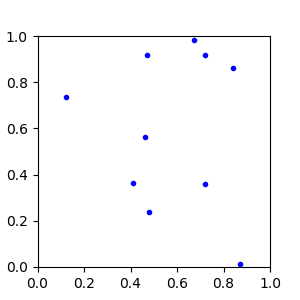

In [239]:
%matplotlib notebook
# This comment above is necessary; without it it doesn't render eagerly, so no animations

Bots = Swarm()
Bots.add(10)
tic = time.time()
F = MagicFigure()
while time.time()-tic < 3:
    Bots.move()
    F.draw_bots(Bots,'b.')
    F.fig.canvas.draw()

In [ ]:
plt.figure()
plt.plot(history);